# Production and Cobb-Douglas Functions in Macroeconomics

In [13]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# The Cobb-Douglas Production Function

At the core of macroeconomics is the study of how inputs to production affect total output. In the case of whole economies, the key inputs to production are simplified to three things:
- K: Capital
- L: Labor
- A: Total Factor Productivity.

These three things all create output, or a country's Gross Domestic Product. One such relationship between outputs and inputs is codified within the Cobb-Douglas Production Function:
$$
Y = A K^\alpha L^\beta
$$
Where $\alpha$ and $\beta$ are exponents.

In [67]:
K = symbols("K")
L = symbols("L")
A = symbols("A")
a = symbols("a")
b = symbols("b")
Y = A * K**a * L **b

In [68]:
Y

A*K**a*L**b

To simplify, let $\beta = 1 - \alpha$.

In [74]:
Y = A * K**a * L **(1 - a)

In [75]:
Y

A*K**a*L**(1 - a)

In [76]:
ln(A) + a * ln(K) + (1 - a) * ln(L)

a*log(K) + (1 - a)*log(L) + log(A)

How will changing each of the components affect Y?

In [14]:
l1 = 0
u1 = 3
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

In [16]:
def CD_fun(x, y):
    return  (x**a)*(y**b)

In [17]:
a=0.3
b=0.7
V = CD_fun(X1, X2)

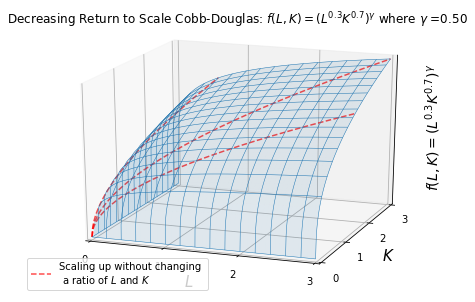

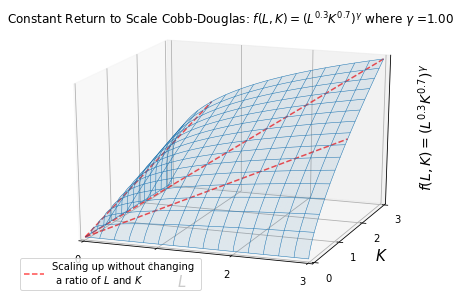

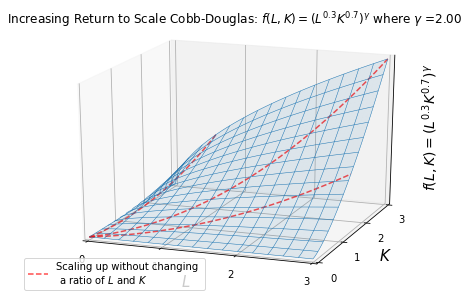

In [18]:
for scale, ttl in zip([0.5, 1, 2], ['Decreasing Return to Scale', 'Constant Return to Scale', 'Increasing Return to Scale']):
    a = scale*0.3
    b = scale*0.7
    V = CD_fun(X1, X2)
    # Preparing for 3D plot
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_wireframe(X1, X2, V,  rstride = 20, cstride = 20, linewidth = 0.5)
    sfc= ax.plot_surface(X1, X2, V,  alpha= 0.1)
    x_lev = np.arange(l1,u1, 0.25)
#    plt.contour(X1, X2, V, CD_fun(x_lev,x_lev) ,  linewidths = 1, colors = 'b')
    ax.set_xlim(l1,u1)
    ax.set_ylim(l1,u1)

    plt.plot(x1, x2, CD_fun(x1, x2), linestyle ='dashed',  c = 'red',alpha = 0.7, label = 'Scaling up without changing \n a ratio of $L$ and $K$')
    plt.plot(0.2*x1, x2, CD_fun(0.2*x1, x2), linestyle ='dashed',alpha = 0.7,  c = 'red')
    plt.plot(x1, 0.5*x2, CD_fun(x1, 0.5*x2), linestyle ='dashed',alpha = 0.7,  c = 'red')

    # Setting/dejunking labels/ticks
    plt.title(ttl+' Cobb-Douglas: ' + r'$f(L,K)=(L^{0.3}K^{0.7})^{\gamma}$'+r' where $\gamma$ ={:02.2f}'.format(scale))
    plt.xlabel('$L$', fontsize = 15)
    plt.ylabel('$K$', fontsize = 15)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel(r'$f(L,K)=(L^{0.3}K^{0.7})^{\gamma}$', rotation = 90, fontsize = 14)
    #ax.set_xticklabels([])
    plt.xticks([0,1,2,3])
    #ax.set_yticklabels([])
    plt.yticks([0,1,2,3])
    #ax.set_zticklabels([])
    ax.set_zticks([])
    ax.view_init(20,290)
    plt.legend(loc='lower left')
    plt.show()
    # fig.savefig(ttl+'Cobb-Douglas.png')